 ### BUILDING CHATBOT WITH MUILTIPLE TOOL INTEGARATION WITH PERSISTENT MEMORY WITH REACT ARCHITECTURE

 #### 
 - TOOLS_USED : ARXIV, WIKIPEDIA, TAVILY SEARCH, Add, Multiply, Divide


In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = os.getenv("LANGCHAIN_TRACING_V2")

In [2]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper


### Setting Arxiv Tool

In [3]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
arxiv.name

'arxiv'

In [4]:
arxiv.invoke("What is the attention is all you need")

'Published: 2021-05-06\nTitle: Do You Even Need Attention? A Stack of Feed-Forward Layers Does Surprisingly Well on ImageNet\nAuthors: Luke Melas-Kyriazi\nSummary: The strong performance of vision transformers on image classification and other vision tasks is often attributed to the design of their multi-head attention layers. However, the extent to which attention is responsible for this strong performance remains unclear. In this short report, we ask: is the attention layer even necessary? Specifi'

#### Setting Wikipedia Tool

In [5]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [6]:
wiki.invoke("What is ai")

'Page: Artificial intelligence\nSummary: Artificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goal'

#### Setting Tavily_Search Tool

In [7]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults()

C:\Users\prana\AppData\Local\Temp\ipykernel_41708\1535493036.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [8]:
tavily.invoke("Providde me the recent hot news on Ai on 13 january 2026")

[{'title': 'AI Today in 5: January 13, 2026, The Ethical AI in Africa Edition',
  'url': 'https://www.jdsupra.com/legalnews/ai-today-in-5-january-13-2026-the-eth-88341/',
  'content': "JD Supra\n\n# AI Today in 5: January 13, 2026, The Ethical AI in Africa Edition\n\nTop AI stories See more +\n\nTop AI stories See more +\n\nTop AI stories See more +\n\nTop AI stories See more +\n\nTop AI stories include:\n\nTop AI stories include:\n\nTop AI stories include:\n\nTop AI stories include:\n\n• Ethical AI in Africa. (TechinAfrica): \n\n• Ethical AI in Africa. (TechinAfrica): \n\n• Ethical AI in Africa. (TechinAfrica): \n\n• Ethical AI in Africa. (TechinAfrica): \n\n• Who should regulate Healthcare AI? (Harvard Gazette): \n\n• Who should regulate Healthcare AI? (Harvard Gazette): \n\n• Who should regulate Healthcare AI? (Harvard Gazette): \n\n• Who should regulate Healthcare AI? (Harvard Gazette): \n\n• Compliance AI matters more than Hype AI. (FinTech Global): [...] For more information on t

In [9]:
## custom_functions
def multiply(a: int, b: int) -> int:
    """"Multiplies two integers and returns the result."""
    return a * b

def add(a: int, b: int) -> int:
    """Adds two integers and returns the result."""
    return a + b

def divide(a: int, b: int) -> float:
    """Divides the first integer by the second and returns the result."""
    if b == 0:
        raise ValueError("Cannot divide by zero.")
    return a / b

#### Combining All The Tools In The List


In [10]:
tools=[arxiv,wiki,tavily,multiply,add,divide]

### Initialiaing my llm Model

In [11]:
from langchain_core.messages import HumanMessage

In [12]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="qwen/qwen3-32b", temperature=0)
llm_with_tools = llm.bind_tools(tools)
response = llm_with_tools.invoke([HumanMessage(content="Give me a brief summary of the Attention is all you need paper.")])
print(response)

content='' additional_kwargs={'reasoning_content': 'Okay, the user is asking for a summary of the "Attention is All You Need" paper. I remember that this paper introduced the Transformer model, which is a big deal in natural language processing. The key innovation was the self-attention mechanism, right? But I need to make sure I get the details right.\n\nFirst, I should check if the paper is available on arXiv. The user mentioned the paper title directly, so using the arxiv function would be the best approach here. The arxiv function can retrieve the paper\'s abstract or summary based on the title. Let me call the arxiv function with the query "Attention is All You Need" to get the necessary information. That should provide me with the abstract, which I can then condense into a brief summary for the user.\n', 'tool_calls': [{'id': '9f2crb6e9', 'function': {'arguments': '{"query":"Attention is All You Need"}', 'name': 'arxiv'}, 'type': 'function'}]} response_metadata={'token_usage': {'

In [13]:
from pprint import pprint
from langchain_core.messages import HumanMessage, AIMessage
response1 =llm_with_tools.invoke([HumanMessage(content="what is The Recent Ai News")])
response1


AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for "The Recent Ai News." I need to figure out which tool to use here. Let\'s see, the available tools are arxiv, wikipedia, tavily_search_results_json, multiply, add, and divide. The user is asking about recent news, so current events. The tavily_search_results_json is described as a search engine optimized for current events. That seems like the right choice here. The other tools are for academic papers, general knowledge, or math operations. So I should use tavily_search_results_json with the query "recent AI news" to get the latest information.\n', 'tool_calls': [{'id': 'kchf4rve6', 'function': {'arguments': '{"query":"recent AI news"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 155, 'prompt_tokens': 609, 'total_tokens': 764, 'completion_time': 0.287099106, 'completion_tokens_details': {'reasoning_tokens': 125}, 'prompt_

In [14]:
response1 =llm_with_tools.invoke([HumanMessage(content="what is The Recent Ai News")]).tool_calls
response1

[{'name': 'tavily_search_results_json',
  'args': {'query': 'Recent AI News'},
  'id': 'j9tg0g8qz',
  'type': 'tool_call'}]

### Entire Chatbot With LangGraph


In [15]:
### state schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]



In [16]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [17]:
def tool_calling_llm(state: State):
    # 1. Get the list of messages from the current state
    messages = state["messages"]
    
    # 2. Invoke the LLM (ensure llm_with_tools is your bound model)
    # This must be the actual function call, not a string!
    response = llm_with_tools.invoke(messages)
    
    # 3. Return the result as a list to be appended to the state
    return {"messages": [response]}

In [18]:
### Build Graph
builder = StateGraph(State)

# 1. Define nodes (Ensure names are consistent)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Adding Edges

builder.add_edge(START, "tool_calling_llm")

builder.add_conditional_edges(
    "tool_calling_llm",
    # if the latest message from assistant is a tool call -> tools_condition routes to tools
    # if the latest message from assistant is not a tool call -> tools_condition routes to END
    tools_condition,
)

# This edge returns the tool output back to the LLM for a final response
builder.add_edge("tools", "tool_calling_llm") 

graph = builder.compile()

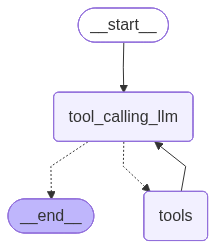

In [19]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [20]:
from langchain_core.messages import HumanMessage

# FIX: Wrap the messages in a dictionary matching your State schema
input_state = {"messages": [HumanMessage(content="What is the recent AI news")]}

# Invoke the graph with the dictionary
result = graph.invoke(input_state)

# Print the messages from the result state
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (3s20rqmmj)
 Call ID: 3s20rqmmj
  Args:
    query: recent AI news
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "The trends that will shape AI and tech in 2026", "url": "https://www.ibm.com/think/news/ai-tech-trends-predictions-2026", "content": "2024 ended on a high note for open-source AI with Meta’s Llama models gaining traction. Since then, the open-source AI ecosystem has grown a lot, with smaller, domain-specific models achieving impressive results—it’s the case for IBM’s Granite, Ai2’s Olmo 3 and, of course, DeepSeek’s models. Anthony Annunziata, Director of Open Source AI at IBM and the AI Alliance, sees this trend accelerating in 2026.\n\n“We’re going to see smaller reaso

In [21]:
input_state = {"messages": [HumanMessage(content="What is the recent AI news on jan 14 2026,also add 5 plus 10 and multiply it by 2")]}

# Invoke the graph with the dictionary
result = graph.invoke(input_state)

# Print the messages from the result state
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news on jan 14 2026,also add 5 plus 10 and multiply it by 2
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (5x0895hgb)
 Call ID: 5x0895hgb
  Args:
    query: recent AI news on jan 14 2026
  add (y3wc85gd1)
 Call ID: y3wc85gd1
  Args:
    a: 5
    b: 10
  multiply (yxc3530x9)
 Call ID: yxc3530x9
  Args:
    a: 15
    b: 2
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "TCS and AMD Announce Strategic Collaboration to Drive AI ...", "url": "https://ir.amd.com/news-events/press-releases/detail/1274/tcs-and-amd-announce-strategic-collaboration-to-drive-ai-adoption-at-scale", "content": "Advanced Micro Devices, Inc. IR Overview\n\n### News & Events\n\n# TCS and AMD Announce Strategic Collaboration to Drive AI Adoption at Scale\n\nMUMBAI, 

In [22]:
### Build Graph
builder = StateGraph(State)

# 1. Define nodes (Ensure names are consistent)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Adding Edges

builder.add_edge(START, "tool_calling_llm")

builder.add_conditional_edges(
    "tool_calling_llm",
    # if the latest message from assistant is a tool call -> tools_condition routes to tools
    # if the latest message from assistant is not a tool call -> tools_condition routes to END
    tools_condition,
)

# This edge returns the tool output back to the LLM for a final response
builder.add_edge("tools", "tool_calling_llm") 


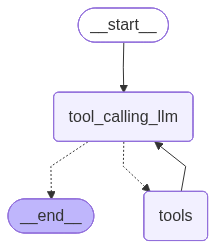

In [23]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()
graph_memory = builder.compile(checkpointer=memory)
display(Image(graph_memory.get_graph().draw_mermaid_png()))



In [24]:
config = {"configurable":{"thread_id":"1"}}

messages = [HumanMessage(content="Add 5 plus 10 and multiply it by 2")]
messages = graph_memory.invoke({"messages": messages},config=config)

for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Add 5 plus 10 and multiply it by 2
================================== Ai Message ==================================
Tool Calls:
  add (0mns89rp6)
 Call ID: 0mns89rp6
  Args:
    a: 5
    b: 10
  multiply (s3m11n7mw)
 Call ID: s3m11n7mw
  Args:
    a: 15
    b: 2
================================= Tool Message =================================
Name: add

15
================================= Tool Message =================================
Name: multiply

30
================================== Ai Message ==================================

The result of adding 5 and 10, then multiplying by 2 is **30**.


In [25]:
messages = [HumanMessage(content="Add That number to 20")]
messages = graph_memory.invoke({"messages": messages},config=config)

for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Add 5 plus 10 and multiply it by 2
================================== Ai Message ==================================
Tool Calls:
  add (0mns89rp6)
 Call ID: 0mns89rp6
  Args:
    a: 5
    b: 10
  multiply (s3m11n7mw)
 Call ID: s3m11n7mw
  Args:
    a: 15
    b: 2
================================= Tool Message =================================
Name: add

15
================================= Tool Message =================================
Name: multiply

30
================================== Ai Message ==================================

The result of adding 5 and 10, then multiplying by 2 is **30**.
================================ Human Message =================================

Add That number to 20
================================== Ai Message ==================================
Tool Calls:
  add (9f8894h2k)
 Call ID: 9f8894h2k
  Args:
    a: 30
    b: 20
================================= Tool Message ====